In [7]:
import tensorflow as tf
gpus = tf.config.experimental.list_logical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [13]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


c:\Users\danie\OneDrive\Escritorio\DeepLearning\GANs\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:

df = tfds.load('fashion_mnist',split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  50%|█████     | 2/4 [00:01<00:00,  2.74 url/s]

Dl Completed...:  75%|███████▌  | 3/4 [00:02<00:00,  1.62 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:05<00:00,  1.35s/ url]

Dl Completed...: 100%|██████████| 4/4 [00:05<00:00,  1.47s/ url]


Dataset fashion_mnist downloaded and prepared to C:\Users\danie\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [16]:
import numpy as np

In [18]:
df.as_numpy_iterator().next()['label']

2

In [19]:
iterator = df.as_numpy_iterator()

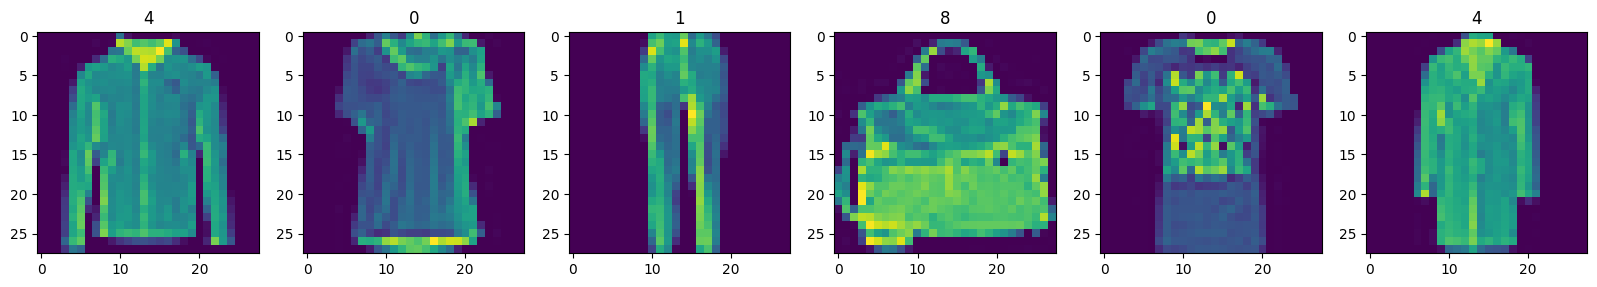

In [27]:
fig, ax = plt.subplots(ncols=6, figsize = (20,20))
for idx in range(6):
    sample = iterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])


In [28]:
def scale_image(data):
    image = data['image']
    return image/255

In [30]:
#Preprocessing
ds = tfds.load('fashion_mnist',split ='train')
ds = ds.map(scale_image)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
df = df.prefetch(64)

In [32]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout,UpSampling2D

In [45]:
def generator_builder():
    model = Sequential()
    #Random values reshaped to 7x7x128
    model.add(Dense(7*7*128, input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    #Upsampling 1
    model.add(UpSampling2D())
    #Kernel = 5
    model.add(Conv2D(128,5,padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding = 'same'))
    model.add(LeakyReLU(0.2))


    model.add(Conv2D(128,4,padding ='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding = 'same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1,4,padding = 'same', activation = 'sigmoid'))

    return model

In [46]:
first_model = generator_builder()
first_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_5 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [47]:
generator = generator_builder()

1/1 [==============================] - 0s 382ms/step


In [62]:
img.shape

(4, 28, 28, 1)

1/1 [==============================] - 0s 462ms/step


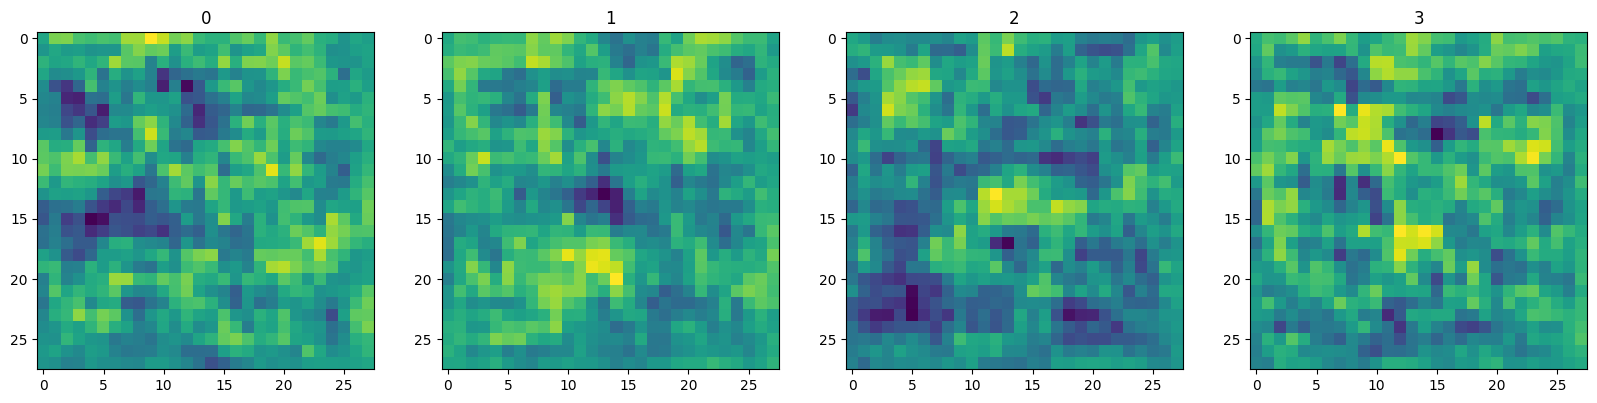

In [64]:
img = generator.predict(np.random.randn(4,128,1))
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

In [69]:
def discriminator_builder():
    model = Sequential()

    model.add(Conv2D(32,5,input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation = 'sigmoid'))
    return model

In [70]:
discriminator = discriminator_builder()
discriminator.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_6 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 128)      

In [72]:
img = generator.predict(np.random.randn(4,128,1))


1/1 [==============================] - 0s 339ms/step


In [73]:
img.shape

(4, 28, 28, 1)

In [74]:
discriminator.predict(img)

1/1 [==============================] - 0s 342ms/step


array([[0.49465033],
       [0.49442938],
       [0.49454328],
       [0.49450383]], dtype=float32)

In [75]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [77]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()


In [79]:
from tensorflow.keras.models import Model

In [118]:
class mnistGan(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        return {'d_loss':total_d_loss, 'g_loss':total_g_loss}


        

In [119]:
mnistgan = mnistGan(generator, discriminator)

In [120]:
mnistgan.compile(g_opt, d_opt, g_loss, d_loss)

In [84]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [102]:
class ModelMonitor(Callback):
    def __init__(self, num_img = 3, latent_dim = 128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs = None):
        random_latent_vectors = tf.random.uniform((self.num_img,self.latent_img,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images',f'generated_img_{epoch}_{i}.png'))

In [111]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [ ]:
hist = mnistgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

In [ ]:
plt.plot(hist.history['d_loss'], label = 'd_loss')
plt.plot(hist.history['g_loss'], label = 'g_loss')

In [ ]:
imgs = generator.predict(tf.radnom.normal((16,128,1)))
imgs

In [ ]:
fig, ax = plt.subplots(ncols = 4, nrows = 4, figsize=(20,20))
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(imgs[(i+1)*(j+1)-1])